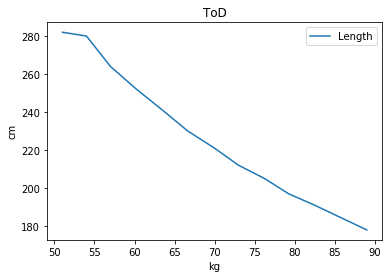

In [64]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import csv

x = []
y = []

with open('data.csv','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append(float(row[0]))
        y.append(float(row[1]) + 23)
        
plt.plot(x,y, label='Length')
plt.xlabel('kg')
plt.ylabel('cm')
plt.title('ToD')
plt.legend()


plt.show()

In [66]:
# Create test and training sets.

import pandas as pd
data = pd.read_csv("data.csv", header=None, names=['kg', 'cm'])
labels = data['kg']
train1 = data.drop(['kg'], axis=1)

from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train1, labels)

In [68]:
# Guess kg based on cm.

from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(x_train, y_train)

reg.score(x_test, y_test)
print(reg.predict(260))

[50.42722222]


In [71]:
# Guess kg based on cm using a different method.

from sklearn import ensemble

clf = ensemble.GradientBoostingRegressor(n_estimators=400, max_depth=5, min_samples_split=2, learning_rate=0.1, loss='ls')

clf.fit(x_train, y_train)
clf.score(x_test, y_test)
print(clf.predict(260))

[51.00060087]


In [77]:
# Guess cm based on kg.

import pandas as pd
data = pd.read_csv("data.csv", header=None, names=['kg', 'cm'])
labels = data['cm']
train1 = data.drop(['cm'], axis=1)

from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train1, labels, test_size=0.10)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(x_train, y_train)

reg.score(x_test, y_test)
print(reg.predict(145))

[-10.40846707]


In [81]:
data = pd.read_csv('data.csv', header=None, names=['kg', 'cm'])
labels = data['cm']
train1 = data.drop(['cm'], axis=1) #This is similar to selecting the kg column

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train1, labels, test_size=0.10, random_state=2)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)
reg.score(x_test, y_test)

import numpy as np
reg.predict(np.array([80]).reshape(-1, 1))

array([-167.99902077])